<a href="https://colab.research.google.com/github/arunkumardubey/Research/blob/master/dnn_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
cifar=datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = cifar



In [0]:
print(train_images[0],train_labels[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]] [6]


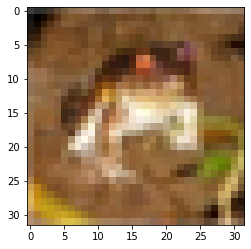

In [0]:
plt.imshow(train_images[0],cmap=plt.cm.binary)


In [0]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

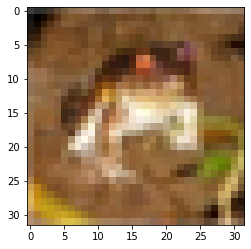

In [0]:
plt.imshow(train_images[0],cmap=plt.cm.binary)

In [0]:
tf.size(train_images[0])

<tf.Tensor: shape=(), dtype=int32, numpy=3072>

In [0]:
model = models.Sequential()


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

In [0]:
model.add(layers.Dense(10))

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9069 - accuracy: 0.3204 - val_loss: 1.7584 - val_accuracy: 0.3736
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7498 - accuracy: 0.3778 - val_loss: 1.7029 - val_accuracy: 0.3946
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7012 - accuracy: 0.3953 - val_loss: 1.7314 - val_accuracy: 0.3821
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6786 - accuracy: 0.4013 - val_loss: 1.7300 - val_accuracy: 0.3828
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6591 - accuracy: 0.4112 - val_loss: 1.6743 - val_accuracy: 0.4056
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6445 - accuracy: 0.4165 - val_loss: 1.6369 - val_accuracy: 0.4169
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6339 - accuracy: 0.4209 - val_loss: 1.6233 - val_accuracy:

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 1.6382 - accuracy: 0.4153


In [0]:
print(test_acc)

0.41530001163482666


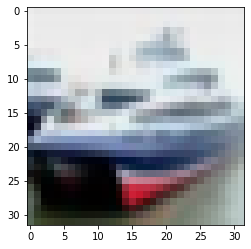

In [0]:
plt.imshow(test_images[1],cmap=plt.cm.binary)
plt.show()

In [0]:
predict=model.predict(test_images)

In [0]:
predict

array([[-0.0240941 , -0.72470987,  0.6509173 , ..., -1.6273371 ,
         0.6155048 , -2.1967797 ],
       [ 1.6225696 ,  3.4561286 , -1.9465029 , ..., -3.325347  ,
         3.7434187 ,  3.4432466 ],
       [ 1.4324107 ,  1.631838  , -1.8736639 , ..., -2.3639145 ,
         2.4024005 ,  0.86188006],
       ...,
       [-1.6463757 , -3.4767363 , -0.2648581 , ...,  1.0674123 ,
        -1.2276657 , -3.111551  ],
       [-1.5652785 , -1.0621312 , -0.20352688, ..., -0.0510895 ,
        -1.777488  , -0.92190826],
       [ 0.48327386, -2.0675995 ,  1.0546936 , ...,  2.6292489 ,
        -1.1585815 , -1.1075488 ]], dtype=float32)

In [0]:
import numpy as np

print(np.argmax(predict[1]))

8


In [0]:
predict[1]

array([ 1.6225696,  3.4561286, -1.9465029, -1.1790183, -1.4352841,
       -2.1712613, -2.6929755, -3.325347 ,  3.7434187,  3.4432466],
      dtype=float32)

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']               

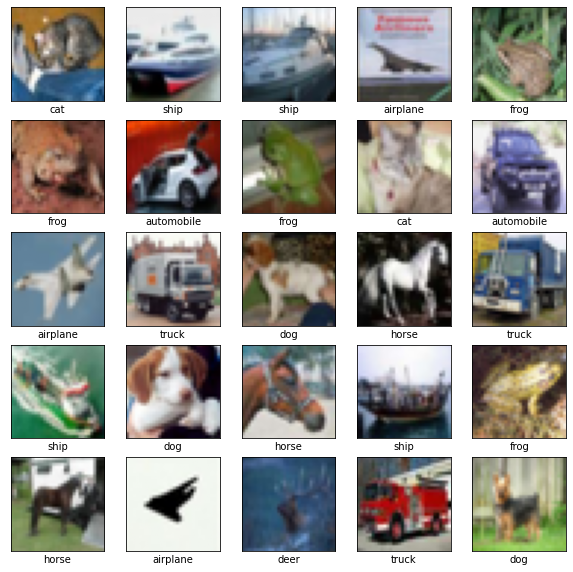

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [0]:
print(np.argmax(predict[3]))

0


In [0]:
print(np.argmax(predict[6]))

3
